## importing necessary Libraries

In [1]:
import pandas as pd
import os

### Task1: Merge the 12 months of sales data into a single CSV file

In [2]:
#df=pd.read_csv('Sales_Data/Sales_April_2019.csv')

In [3]:
files = [file for file in os.listdir('Sales_Data')]
all_months_data = pd.DataFrame()

In [4]:
for file in files:
    df=pd.read_csv('Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data, df])

In [5]:
all_months_data.to_csv('all_data.csv', index=False)

### Read in updated dataframe

In [6]:
all_data=pd.read_csv('all_data.csv')


In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data

#### Drop rows of NaN

In [8]:
nan_df=all_data[all_data.isna().any(axis=1)]
#nan_df

all_data = all_data.dropna(how='all')
all_data.head()

#nan_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### find 'or' and delete it

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#all_data

### convert column to the correct data type

In [10]:
all_data['Quantity Ordered']= all_data['Quantity Ordered'].astype('int32')
#all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])


In [11]:
all_data['Price Each']=all_data['Price Each'].astype('float32')

### Augment data with additional columns

### Task2: Add Month Column

In [12]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

In [13]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [14]:
type(all_data['Quantity Ordered'])

pandas.core.series.Series

In [15]:
type(all_data['Price Each'])

pandas.core.series.Series

### Task 3: Add the Sales column

In [16]:
all_data['Sales']= all_data['Quantity Ordered']* all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


In [17]:
group_by_month=all_data.groupby('Month').sum()
group_by_month


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.375,1822256.75
2,13449,2188884.750,2202022.50
3,17005,2791207.750,2807100.25
4,20558,3367671.000,3390670.25
5,18667,3135125.000,3152606.75
6,15253,2562025.500,2577802.25
7,16072,2632539.500,2647775.75
8,13448,2230345.500,2244467.75
9,13109,2084992.125,2097560.00


### Task 4:- Add a city column

In [18]:
def get_city(addr):
    return addr.split(',')[1]

def get_state(addr):
    return addr.split(',')[2].split(' ')[1]

In [19]:
all_data['City'] = all_data['Purchase Address'].apply(lambda x:get_city(x)+" ("+ get_state(x)+")")

In [20]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)


### Task 5: Adding Time column

In [21]:
all_data['Order Date']= pd.to_datetime(all_data['Order Date'])

In [22]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA)


In [23]:
all_data['Hour']= all_data['Order Date'].dt.hour

In [24]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22


### Q.1: What was the best month for sales? How much was earned that month?

In [26]:
best_month_for_sale = group_by_month.max()
best_month_for_sale

Quantity Ordered      28114.0
Price Each          4588415.5
Sales               4613443.5
dtype: float64

In [27]:
best_month_for_sale['Sales']




4613443.5

In [28]:
group_by_month[(group_by_month['Sales']==best_month_for_sale['Sales'])]

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.5,4613443.5


In [29]:
totalEarnedOnBestMonth = best_month_for_sale['Sales']

In [30]:
totalEarnedOnBestMonth

4613443.5

In [31]:
import matplotlib.pyplot as plt

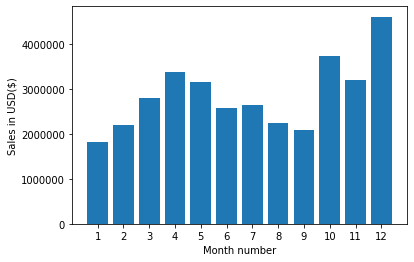

In [32]:
months = range(1, 13)
plt.bar(months, group_by_month['Sales'])
plt.xticks(months)
plt.ylabel("Sales in USD($)")
plt.xlabel('Month number')
plt.show()

### Q.2: Which city had the highest number of sales?

In [33]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),9


In [34]:
group_by_city=all_data.groupby('City').sum()
group_by_city.head()

,Quantity Ordered,Price Each,Month,Sales,Hour
City,,,,,
Atlanta (GA),16602,2779908.250,104794,2795498.50,214264
Austin (TX),11153,1809873.625,69829,1819581.75,141946
Boston (MA),22528,3637409.750,141112,3661642.00,288225
Dallas (TX),16730,2752627.750,104620,2767975.50,214390
Los Angeles (CA),33289,5421435.000,208325,5452571.00,427444


In [35]:
max_city_sales = group_by_city['Sales'].max()
max_city_sales

8262204.0

In [36]:
import matplotlib.pyplot as plt

In [37]:
cities = [city for city, df in all_data.groupby('City')]

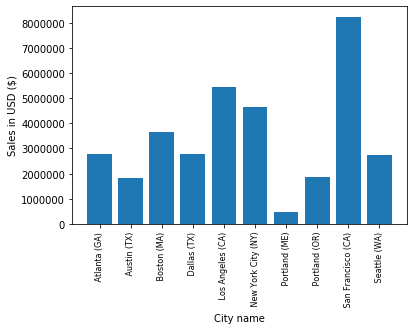

In [38]:
plt.bar(cities, group_by_city['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

### Q.3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [39]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22


In [40]:
hours = [hour for hour,df in all_data.groupby('Hour')]

In [41]:
import matplotlib.pyplot as plt

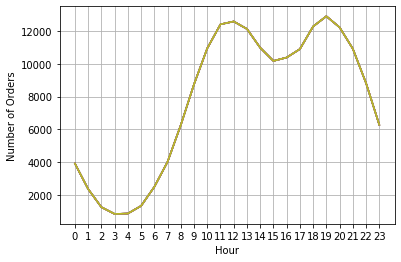

In [42]:
plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

### Q.4: What Products are most often sold together

In [43]:
all_data.head(7)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),9
6,176562,USB-C Charging Cable,1,11.950000,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.950000,San Francisco (CA),13
7,176563,Bose SoundSport Headphones,1,99.989998,2019-04-02 07:46:00,"668 Center St, Seattle, WA 98101",4,99.989998,Seattle (WA),7


In [44]:
## for this we have to group by Order Id
df1 = all_data[all_data['Order ID'].duplicated(keep=False)]

In [45]:
df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1 = df1[['Order ID', 'Grouped']].drop_duplicates()

/home/omprakash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
df1.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [47]:
from itertools import combinations
from collections import Counter

In [48]:
counter = Counter()

In [51]:
for row in df1["Grouped"]:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 2)))
    
print(counter)

Counter({('iPhone', 'Lightning Charging Cable'): 1005, ('Google Phone', 'USB-C Charging Cable'): 987, ('iPhone', 'Wired Headphones'): 447, ('Google Phone', 'Wired Headphones'): 414, ('Vareebadd Phone', 'USB-C Charging Cable'): 361, ('iPhone', 'Apple Airpods Headphones'): 360, ('Google Phone', 'Bose SoundSport Headphones'): 220, ('USB-C Charging Cable', 'Wired Headphones'): 160, ('Vareebadd Phone', 'Wired Headphones'): 143, ('Lightning Charging Cable', 'Wired Headphones'): 92, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 81, ('Vareebadd Phone', 'Bose SoundSport Headphones'): 80, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 77, ('Apple Airpods Headphones', 'Wired Headphones'): 69, ('Lightning Charging Cable', 'USB-C Charging Cable'): 58, ('Lightning Charging Cable', 'AA Batteries (4-pack)'): 55, ('Lightning Charging Cable', 'Lightning Charging Cable'): 54, ('Bose SoundSport Headphones', 'Wired Headphones'): 53, ('AA Batteries (4-pack)', 'Lightning Charging Cable')

In [52]:
for key, value in counter.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Q.5: What product sold the most? Why do you think it sold the most?

In [53]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14


In [54]:
product_group = all_data.groupby('Product').sum()
product_group.head()

,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
20in Monitor,4129,4.510690e+05,29336,4.541487e+05,58764
27in 4K Gaming Monitor,6244,2.429638e+06,44440,2.435098e+06,90916
27in FHD Monitor,7550,1.125975e+06,52558,1.132424e+06,107540
34in Ultrawide Monitor,6199,2.348718e+06,43304,2.355558e+06,89076
AA Batteries (4-pack),27635,7.901568e+04,145558,1.061184e+05,298342


In [55]:
quantity_ordered = product_group['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int32

In [56]:
products = [product for product in product_group.index]


In [57]:
products[1:3]

['27in 4K Gaming Monitor', '27in FHD Monitor']

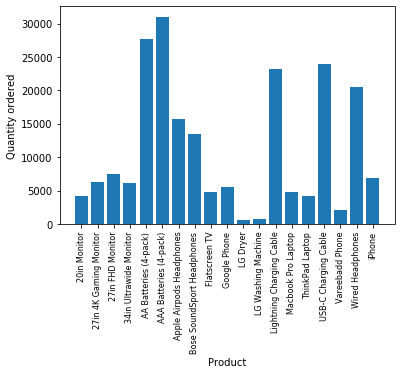

In [58]:
plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.xlabel("Product")
plt.ylabel('Quantity ordered')
plt.show()

In [59]:
prices = all_data.groupby('Product').mean()['Price Each']

In [60]:
prices.head(3)

Product
20in Monitor              109.989998
27in 4K Gaming Monitor    389.989990
27in FHD Monitor          149.990005
Name: Price Each, dtype: float32

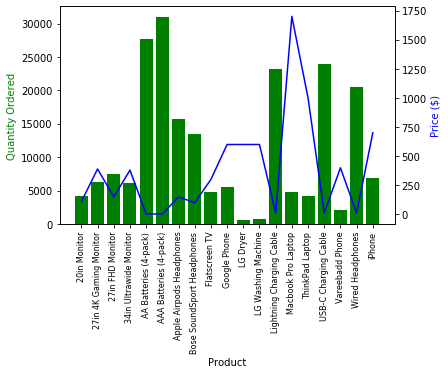

In [61]:
fig, ax1 = plt.subplots()
ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()